(15 points) Use the Matlab function **rand()** to GENERATE a DATA SAMPLE of N points from the uniform distribution on [0, 1]. Transform the resulting data x to generate a transformed data sample where each datum y := (−1/λ) log(x) with λ = 5. The transformed data y will have some distribution with parameter λ; what is its analytical form ? 

Use a Gamma prior on the parameter λ, where the Gamma distribution has parameters α = 5.5 and β = 1.
Consider various sample sizes N = 5, 10, 20, 40, 60, 80, 100, 500, 10^3, 10^4. For each sample size N, repeat the following experiment M ≥ 100 times: generate the data, get the maximum likelihood estimate λ_ML, get the Bayesian estimate as the posterior mean λ_PosteriorMean, and measure the relative errors |λ_hat − λtrue|/λtrue for both the estimates.

• (5 points) Derive a formula for the posterior mean.

• (8 points) Plot a single graph that shows the relative errors for each value of N as a box plot (use the Matlab boxplot() function), for both the estimates.

• (2 points) Interpret what you see in the graph. (i) What happens to the error as N increases ? (ii) Which of the two estimates will you prefer and why ?

In [1]:
import numpy as np
np.random.seed(0)

from math import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lamda = 5.0

In [3]:
def generate_samples(N):
    samples = []
    for _ in range(N):
        x = np.random.rand()
        y = (log(x))*(-1/lamda)
        samples.append(y)
    return samples 

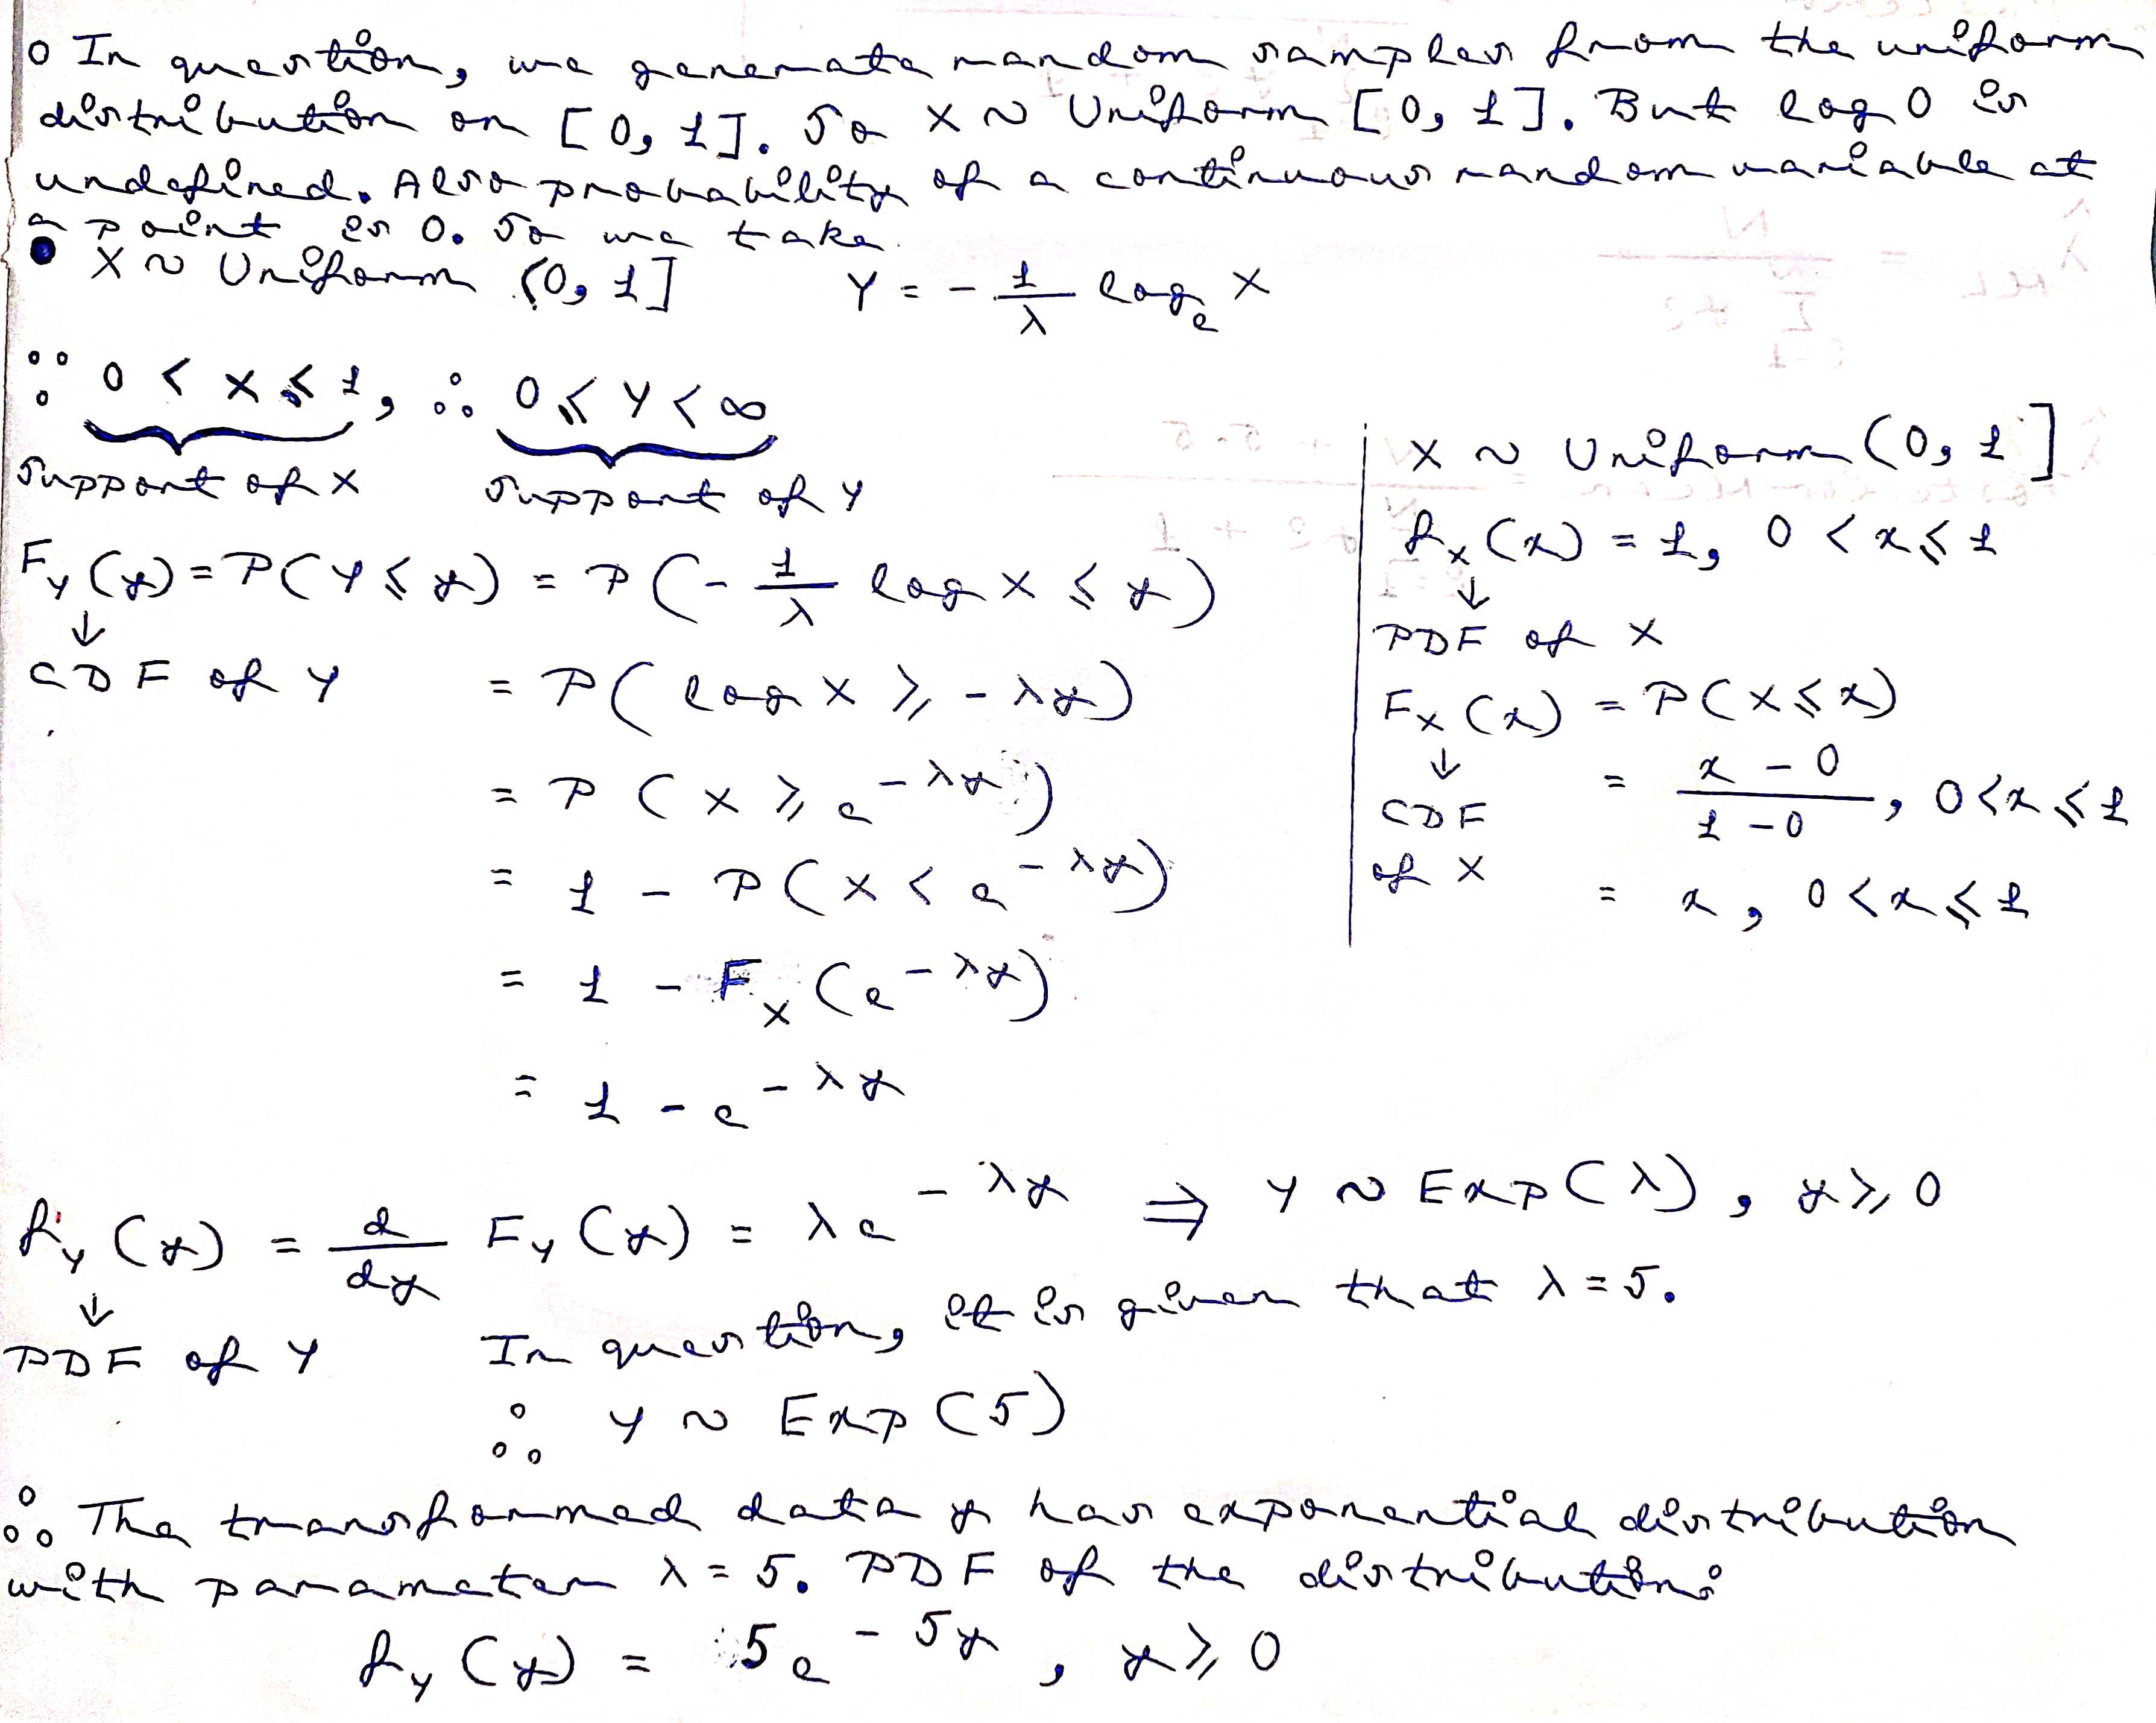

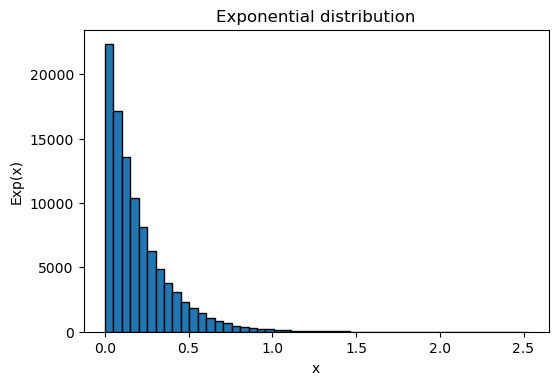

In [4]:
samples = generate_samples(10**5)
plt.figure(dpi = 100)
plt.title('Exponential distribution')
plt.xlabel('x')
plt.ylabel('Exp(x)')
plt.hist(samples , bins=50, edgecolor = 'black')
plt.show()

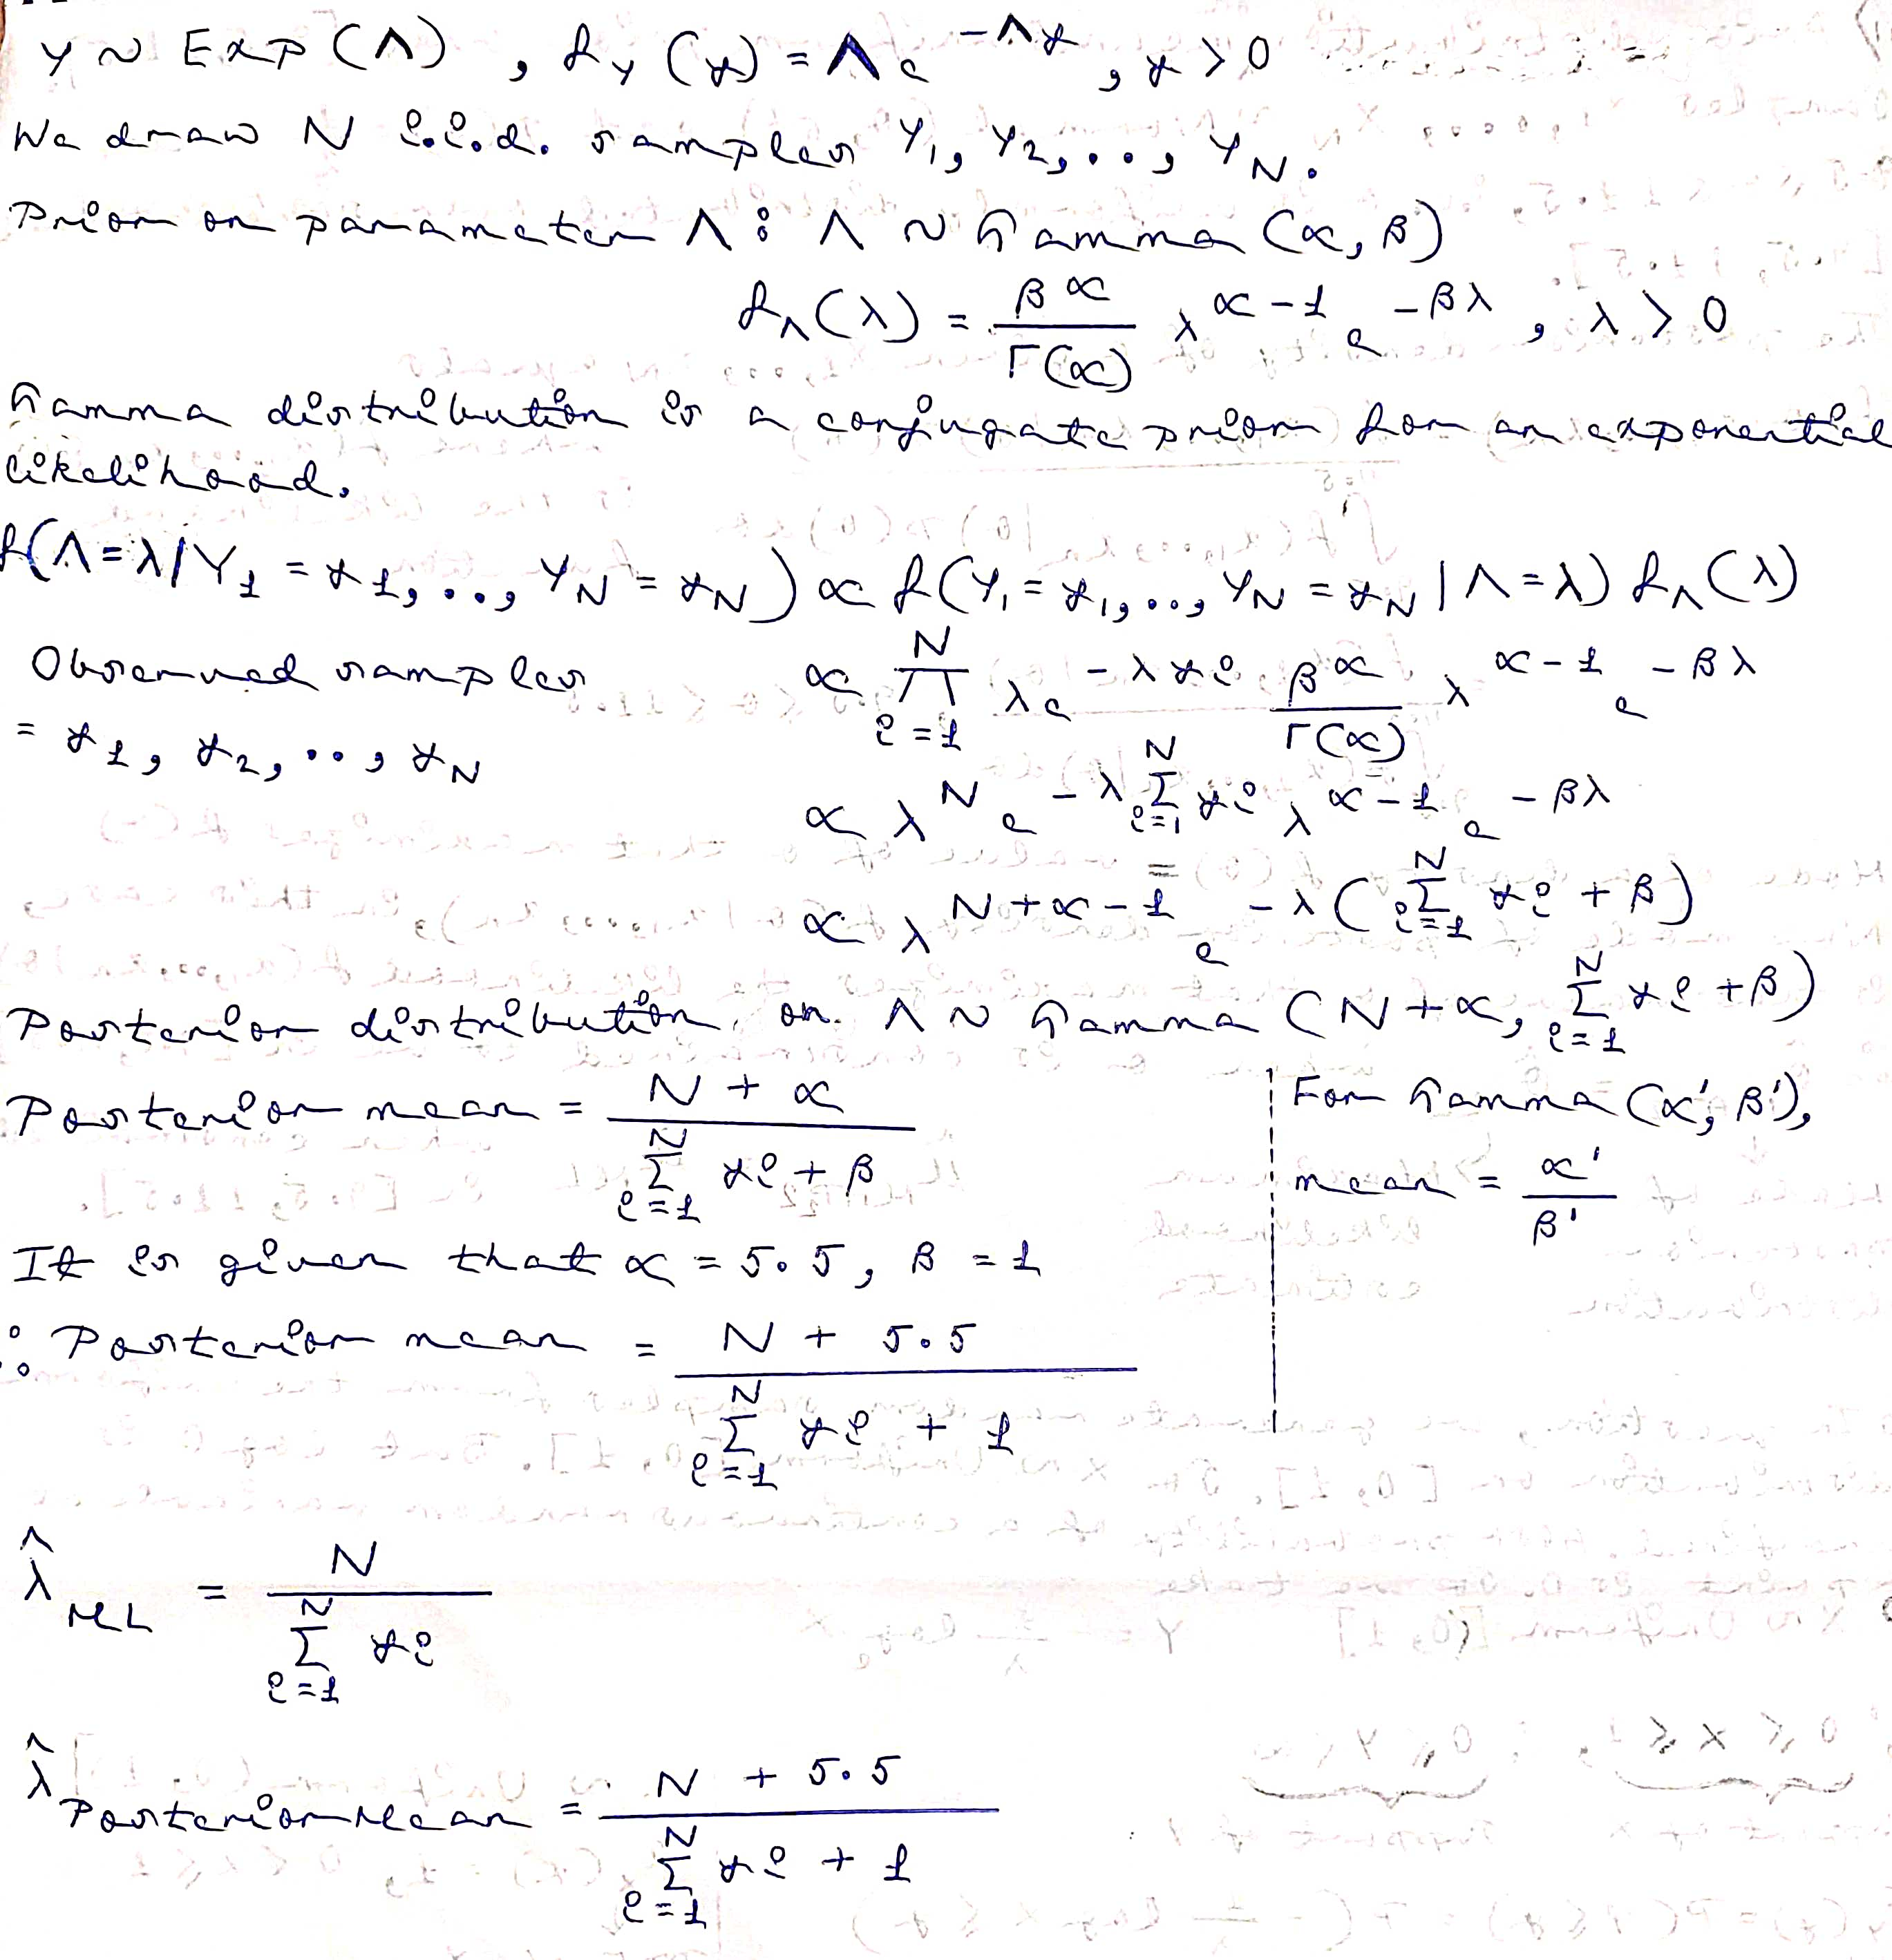

In [5]:
def compute_sample_mean(samples):
    n = len(samples)
    s = 0
    for i in range(n):
        s += samples[i]
    return s/n

def compute_estimates(samples):
    n = len(samples)
    x_bar = compute_sample_mean(samples)
    λ_mle = 1/x_bar
    λ_posterior_mean = (n + 5.5)/((n*x_bar)+1)
    return λ_mle,λ_posterior_mean

def error(λ_hat,λ_true=5):
    return (abs(λ_hat - λ_true))/λ_true

In [6]:
def experiment(N,M=100):
    error_list_mle = []
    error_list_map = []

    #Repeating the experiment M times
    for i in range(M):
        samples = generate_samples(N) #Generating the data
        λ_mle,λ_map = compute_estimates(samples)
        error_list_mle.append(error(λ_mle))
        error_list_map.append(error(λ_map))
        
    return error_list_mle,error_list_map

In [25]:
N = [5, 10, 20, 40, 60, 80, 100, 500, 10**3, 10**4]

#Running experiment 100 times for different values of N
E_list_mle = []
E_list_map = []

for n in N:
    error_list_mle,error_list_map = experiment(n,M=100)
    E_list_mle.append(error_list_mle)
    E_list_map.append(error_list_map)

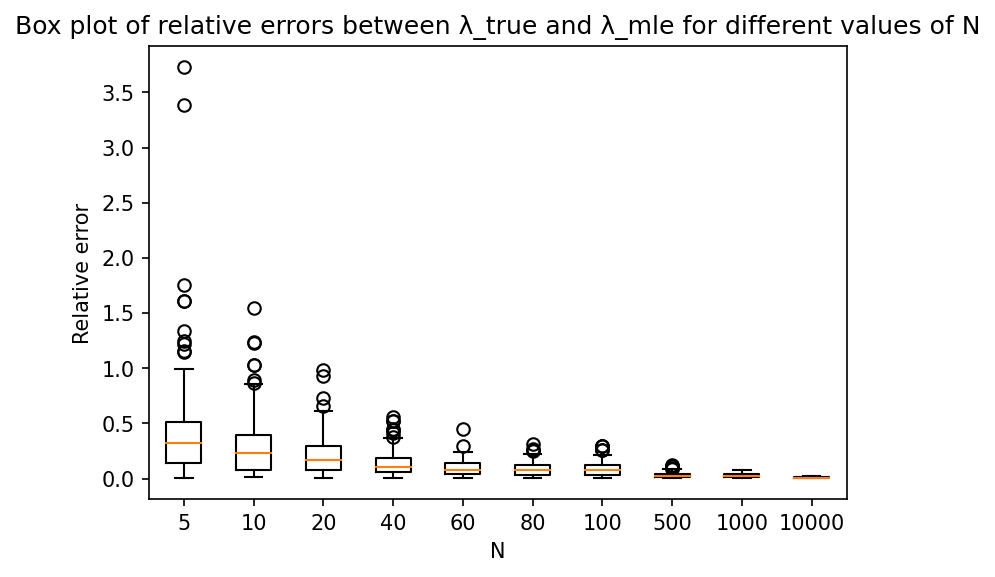

In [26]:
#MLE
plt.figure(dpi=150)
plt.boxplot(E_list_mle,labels=['5','10','20','40','60','80','100','500','1000','10000'])
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Box plot of relative errors between λ_true and λ_mle for different values of N')
#plt.ylim(2)
plt.show()

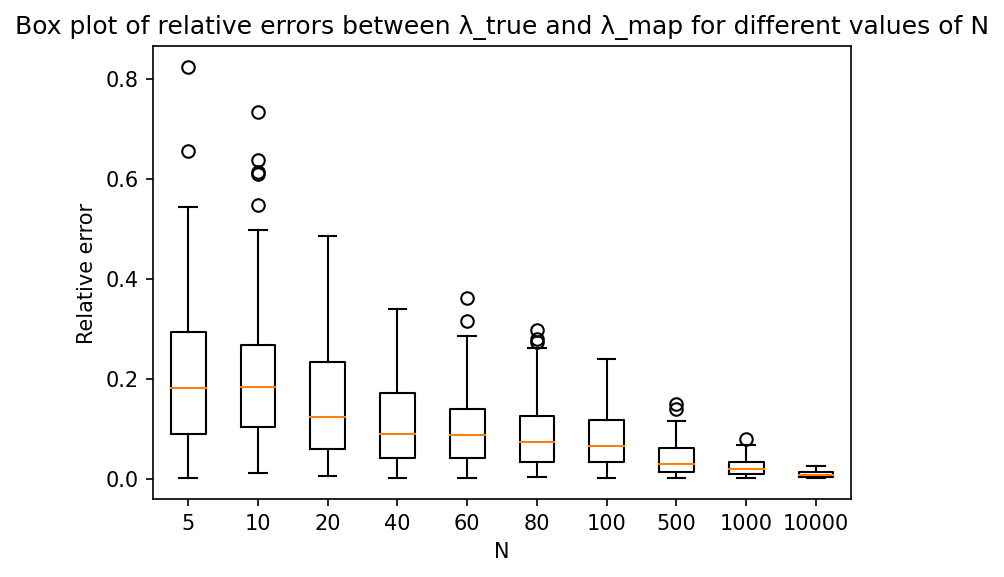

In [13]:
#MAP1
plt.figure(dpi=150)
plt.boxplot(E_list_map,labels=['5','10','20','40','60','80','100','500','1000','10000'])
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Box plot of relative errors between λ_true and λ_map for different values of N')
plt.show()

 <b>(i) What happens to the error as N increases ?</b>
 
As N increases,both the estimates approach the true mean of the distribution.Thus the relative error or the deviation of the estimates from the true mean decreases as can be observed in the box plots.

**(ii) Which of the two estimates will you prefer and why ?**

•I prefer λ_PosteriorMean which is the maximum-a-posteriori estimate of λ with a Gamma prior. Since Gamma prior is a conjugate prior for exponential likelihood, thus the posterior density has the same class of distribution as the prior density and helps us easily understand the effect of incorporating data into the prior. MAP takes into consideration the prior knowledge about the unknown parameter.

MLE doesn't allow us to incorporate prior knowledge about the unknown parameter and produces an estimate only based on observed data. We may not get a valid estimate if observed data is not representative of the underlying distribution. Hence I also do not prefer λ_MLE.